In [1]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from keras.utils import to_categorical
def generate_vgg16(num_classes, in_shape = (224,224,3)):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same',name='block1_conv1', input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='block1_conv2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

    # Block 2
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block2_conv1'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block2_conv2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

    # Block 3
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block3_conv1'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block3_conv2'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block3_conv3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

    # Block 4
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block4_conv1'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block4_conv2'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block4_conv3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

    # Classification block
    model.add(Flatten(name='flatten'))
    model.add(Dense(512, activation='relu', name='fc1',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(0.03),
    activity_regularizer=regularizers.l2(0.03)))
    model.add(Dropout(0.8))
    model.add(Dense(512, activation='relu', name='fc2',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(0.05),
    activity_regularizer=regularizers.l2(0.05)))
    model.add(Dropout(0.8))
    model.add(Dense(num_classes, activation='softmax', name='predictions'))

    return model

model=generate_vgg16(7)

In [2]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/mcproject

/content/drive/MyDrive/mcproject


In [4]:
opt = keras.optimizers.RMSprop(lr = 0.00008, decay = 1e-6)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 32)      896       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 32)      9248      
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 32)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 64)      18496     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 64)      36928     
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 64)        0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 128)       7

In [5]:
model.load_weights('53.h5')

In [6]:
from numpy import load
data = load('datanomask50K.npz')
X, Y= data['arr_0'], data['arr_1']
!pip install sklearn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
out_encoder = LabelEncoder()
out_encoder.fit(Y)
Y=out_encoder.transform(Y)

#p=out_encoder.classes_
#q=out_encoder.transform(p)
#Y_t=out_encoder.transform(Y)
Y=to_categorical(Y)
#from sklearn.model_selection import train_test_split
#train_X=X
#train_label=Y_t
X1=X[:15000]
Y1=Y[:15000]
#print(Y_t.shape,p)
X=X[:20]
Y=Y[:20]

In [7]:

out_encoder.classes_

array(['Black', 'East Asian', 'Indian', 'Latino_Hispanic',
       'Middle Eastern', 'Southeast Asian', 'White'], dtype='<U15')

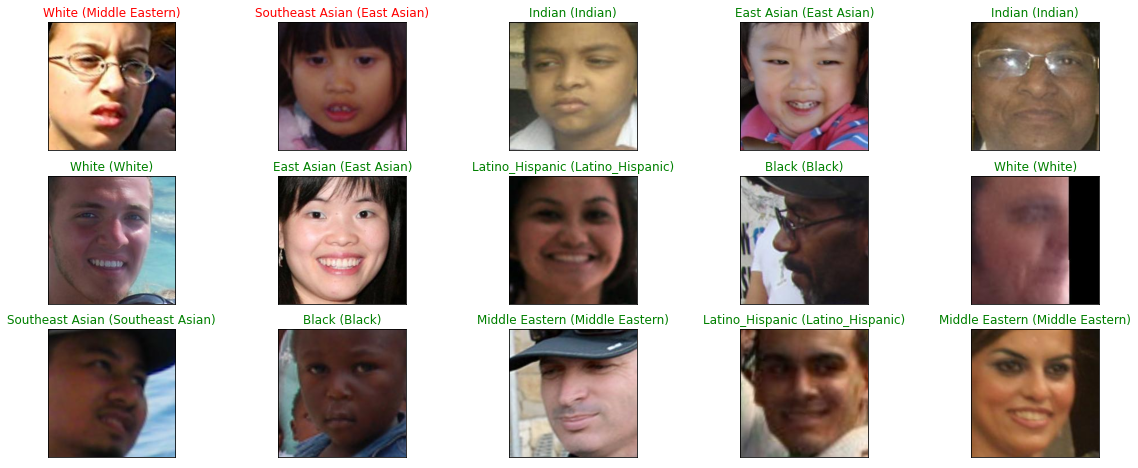

In [8]:
from google.colab.patches import cv2_imshow
labels =['Black', 'East Asian', 'Indian', 'Latino_Hispanic',
       'Middle Eastern', 'Southeast Asian', 'White']

import cv2
import matplotlib.pyplot as plt
x_val=X
y_val=Y
y_hat = model.predict(x_val)


figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_val.shape[0], size=15,replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(cv2.cvtColor(x_val[index], cv2.COLOR_BGR2RGB))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_val[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [ ]:
label =['Black', 'East Asian', 'Indian', 'Latino_Hispanic',
       'Middle Eastern', 'Southeast Asian', 'White']

In [ ]:
p=model.predict(X1)

In [ ]:
b=0
e=0
ind=0
l=0
m=0
sa=0
w=0
b1=0
e1=0
ind1=0
l1=0
m1=0
sa1=0
w1=0
print(Y1[0])
Y1= [np.argmax(y, axis=None, out=None) for y in Y1]
print(Y1[0])
for i in range(0,len(X1)):
  if(label[Y1[i]]=='Black'):
    b=b+1
    if(Y1[i]==np.argmax(p[i])):
      b1=b1+1
  if(label[Y1[i]]=='East Asian'):
    e=e+1
    if(Y1[i]==np.argmax(p[i])):
      e1=e1+1
  if(label[Y1[i]]=='Indian'):
    ind=ind+1
    if(Y1[i]==np.argmax(p[i])):
      ind1=ind1+1
  if(label[Y1[i]]=='Latino_Hispanic'):
    l=l+1
    if(Y1[i]==np.argmax(p[i])):
      l1=l1+1
  if(label[Y1[i]]=='Middle Eastern'):
    m=m+1
    if(Y1[i]==np.argmax(p[i])):
      m1=m1+1
  if(label[Y1[i]]=='Southeast Asian'):
    sa=sa+1
    if(Y1[i]==np.argmax(p[i])):
      sa1=sa1+1
  if(label[Y1[i]]=='White'):
    w=w+1
    if(Y1[i]==np.argmax(p[i])):
      w1=w1+1




[0. 1. 0. 0. 0. 0. 0.]
1


In [ ]:
s=e+b+ind+l+w+m+sa
print(s)

15000


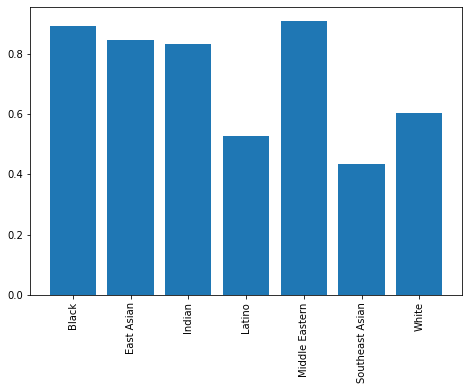

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Black', 'East Asian', 'Indian', 'Latino',
       'Middle Eastern', 'Southeast Asian', 'White']
students = [e1/e,b1/b,ind1/ind,l1/l,w1/w,m1/m,sa1/sa]
ax.bar(langs,students)

# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')

plt.show()

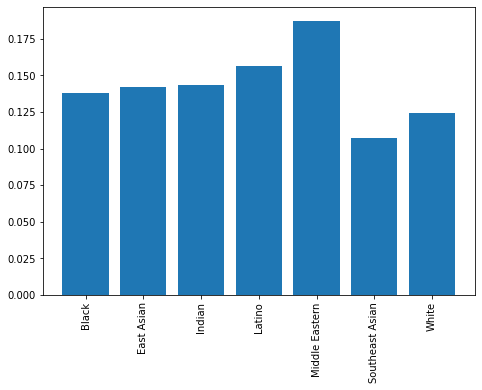

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Black', 'East Asian', 'Indian', 'Latino',
       'Middle Eastern', 'Southeast Asian', 'White']
students = [e/s,b/s,ind/s,l/s,w/s,m/s,sa/s]
ax.bar(langs,students)

# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')

plt.show()